In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
import matplotlib.patches as mpatches
from matplotlib import pyplot as plt
import random

import sys
import matplotlib
import sklearn
import numpy
import keras
import tensorflow as tf 
from keras.layers import Dense, Flatten, BatchNormalization, Dropout, Convolution2D, MaxPool2D
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import Callback

Using TensorFlow backend.


In [2]:
print('Versão Python ', sys.version)
print('Versão Numpy ', numpy.version.version)
print('Versão Pandas ', pd.__version__)
print('Versão Matplotlib ', matplotlib.__version__)
print('Versão Sklearn ', sklearn.__version__)
print('Versão Keras', keras.__version__)
print('Versão TensorFlow', tf.__version__)

Versão Python  3.6.10 |Anaconda, Inc.| (default, Jan  7 2020, 15:18:16) [MSC v.1916 64 bit (AMD64)]
Versão Numpy  1.17.4
Versão Pandas  0.25.3
Versão Matplotlib  3.1.2
Versão Sklearn  0.22.1
Versão Keras 2.3.1
Versão TensorFlow 2.0.0


#### Importando os dados

In [3]:
IdLookupTable = pd.read_csv('IdLookupTable.csv')
SampleSubmission = pd.read_csv('SampleSubmission.csv')
training = pd.read_csv('training.csv')
test = pd.read_csv('test.csv')

#### Remoção de registros com dados faltantes

In [4]:
training = training.dropna()

#### Convertendo os dados de cada imagem para uma matriz de inteiros e remodelando para uma matriz de dimsão 96x96

In [5]:
training['Image'] = training['Image'].apply(lambda x: np.fromstring(x, dtype=int, sep=' ').reshape((96,96)))

#### Convertendo os dados da imagem em array e atribuindo para variável X

In [6]:
X = np.asarray([training['Image']], dtype=np.uint8).reshape(training.shape[0],96,96,1)

#### Cria um novo dataset chamado y, removendo a feature "Imagem"

In [7]:
y = training.drop(['Image'], axis=1)

#### Cria a variável y_ndarray convertendo a variável y para numpy.ndarray

In [8]:
y_ndarray = y.to_numpy()

#### Divide os dados do dataset em subconjuntos aleatórios de treino e teste

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y_ndarray, test_size=0.3, random_state=42)

#### Criação da variável do tipo sequential
https://keras.io/models/sequential/

In [91]:
model = Sequential()

#### Função para criar as camadas da rede neural convulacional
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Convolution2D: https://keras.io/layers/convolutional/#conv2d <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;LeakyReLU: https://keras.io/layers/advanced-activations/#leakyrelu <br/>
BatchNormalization: https://keras.io/layers/normalization/#batchnormalization <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;MaxPool2D: https://keras.io/layers/pooling/#maxpooling2d
 

In [92]:
def add_model(model, filters, maxpooling, *inputshape):   
    if inputshape:
        model.add(Convolution2D(filters, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
        model.add(LeakyReLU(alpha = 0.1))
        model.add(BatchNormalization())
    else:
      if maxpooling:
        model.add(Convolution2D(filters, (3,3), padding='same', use_bias=False))
        model.add(LeakyReLU(alpha = 0.1))
        model.add(BatchNormalization())
        model.add(MaxPool2D(pool_size=(2, 2)))
      else:
        model.add(Convolution2D(filters, (3,3), padding='same', use_bias=False))
        model.add(LeakyReLU(alpha = 0.1))
        model.add(BatchNormalization())
    

#### Cria a primeira camada com inut_shape

In [93]:
add_model(model, 32, False, True)

#### Cria as camadas ocultas

In [94]:
add_model(model, 32, True)
add_model(model, 64, False)
add_model(model, 64, True)
add_model(model, 128, False)
add_model(model, 128, True)
add_model(model, 256, False)
add_model(model, 256, True)
add_model(model, 512, False)
add_model(model, 512, True)

#### Cria as camadas ocultas

In [95]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))

#### Configura o modelo para treinamento

In [15]:
model.compile(optimizer='Adam', loss='mse', metrics=['mae', 'acc'])

In [16]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath = 'layer10_epoc100_kernel3p3_drop0p1.hdf5', monitor='val_mae', verbose=1, save_best_only=False)

In [17]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.02, callbacks=[checkpointer])

Train on 1468 samples, validate on 30 samples
Epoch 1/100
1468/1468 [==============================] - 188s 128ms/step - loss: 163.1677 - mae: 7.8447 - acc: 0.4244 - val_loss: 108.7276 - val_mae: 9.1182 - val_acc: 0.7667

Epoch 00001: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 2/100
1468/1468 [==============================] - 204s 139ms/step - loss: 25.8120 - mae: 4.0026 - acc: 0.5102 - val_loss: 8.6133 - val_mae: 2.1948 - val_acc: 0.7667

Epoch 00002: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 3/100
1468/1468 [==============================] - 196s 133ms/step - loss: 21.5955 - mae: 3.6691 - acc: 0.5436 - val_loss: 7.8066 - val_mae: 2.1195 - val_acc: 0.7667

Epoch 00003: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 4/100
1468/1468 [==============================] - 189s 129ms/step - loss: 17.3846 - mae: 3.2834 - acc: 0.5960 - val_loss: 5.7092 - val_mae: 1.8057 - val_acc: 0.9333

Epoch 00004: saving model to layer10_epoc100_kernel3p3_

Epoch 35/100
1468/1468 [==============================] - 185s 126ms/step - loss: 6.5087 - mae: 1.9701 - acc: 0.7677 - val_loss: 5.0263 - val_mae: 1.7852 - val_acc: 0.8000

Epoch 00035: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 36/100
1468/1468 [==============================] - 186s 127ms/step - loss: 6.3714 - mae: 1.9480 - acc: 0.7786 - val_loss: 5.7395 - val_mae: 2.0348 - val_acc: 0.7000

Epoch 00036: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 37/100
1468/1468 [==============================] - 186s 127ms/step - loss: 6.1960 - mae: 1.9149 - acc: 0.7841 - val_loss: 2.5331 - val_mae: 1.1610 - val_acc: 0.9333

Epoch 00037: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 38/100
1468/1468 [==============================] - 188s 128ms/step - loss: 5.1725 - mae: 1.7522 - acc: 0.7718 - val_loss: 2.0736 - val_mae: 1.0410 - val_acc: 0.9333

Epoch 00038: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 39/100
1468/1468 [============

Epoch 69/100
1468/1468 [==============================] - 197s 134ms/step - loss: 4.5489 - mae: 1.6330 - acc: 0.8236 - val_loss: 4.1065 - val_mae: 1.6661 - val_acc: 0.8000

Epoch 00069: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 70/100
1468/1468 [==============================] - 186s 127ms/step - loss: 4.4411 - mae: 1.6156 - acc: 0.8256 - val_loss: 3.5934 - val_mae: 1.4177 - val_acc: 0.7333

Epoch 00070: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 71/100
1468/1468 [==============================] - 185s 126ms/step - loss: 4.9869 - mae: 1.7158 - acc: 0.8215 - val_loss: 1.9679 - val_mae: 0.9702 - val_acc: 0.8333

Epoch 00071: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 72/100
1468/1468 [==============================] - 188s 128ms/step - loss: 4.7762 - mae: 1.6713 - acc: 0.8161 - val_loss: 2.4060 - val_mae: 1.1022 - val_acc: 0.8333

Epoch 00072: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 73/100
1468/1468 [============

In [37]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 4.297087849114914
Test accuracy: 1.6626379489898682


In [38]:
test['Image'] = test['Image'].apply(lambda x: np.fromstring(x, dtype=int, sep=' ').reshape((96,96)))
test_X = np.asarray([test['Image']], dtype=np.uint8).reshape(test.shape[0],96,96,1)
train_predicts = model.predict(X_train)

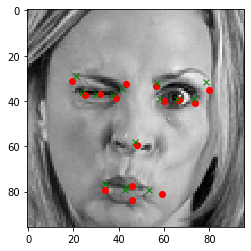

In [39]:
plt.imshow(X_train[0].reshape((96,96)), cmap='gray')

for i in range(1,31,2):
    plt.plot(train_predicts[0][i-1], train_predicts[0][i], 'ro')
    plt.plot(y_train[0][i-1], y_train[0][i], 'x', color='green')

plt.show()

#### Loss vs Epoch

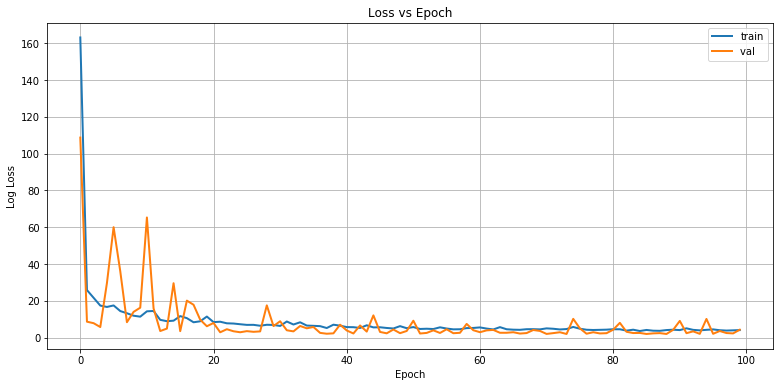

<Figure size 1440x1080 with 0 Axes>

In [84]:
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'], linewidth=2, label="train")
plt.plot(history.history['val_loss'], linewidth=2, label="val ")
plt.legend()
plt.title('Loss vs Epoch')
plt.grid()

plt.xlabel("Epoch")
plt.ylabel("Log Loss")
fig= plt.figure(figsize=(20,15))
plt.show()

#### Mean Absolute Error vs Epoch

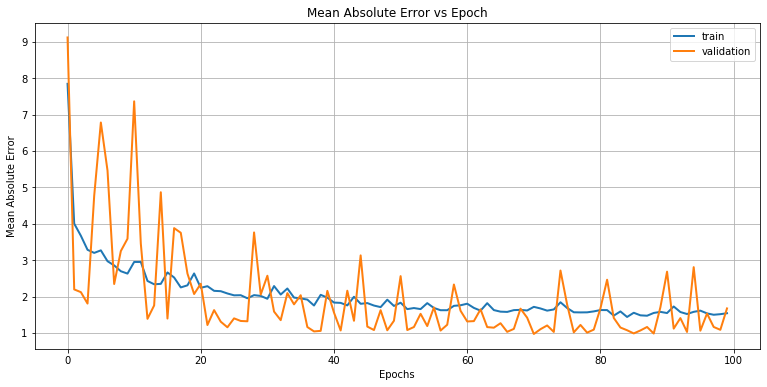

In [85]:
plt.figure(figsize=(13,6))
plt.plot(history.history['mae'], linewidth=2)
plt.plot(history.history['val_mae'], linewidth=2)
plt.title('Mean Absolute Error vs Epoch')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epochs')
plt.grid()
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

#### Accuracy vs Epoch

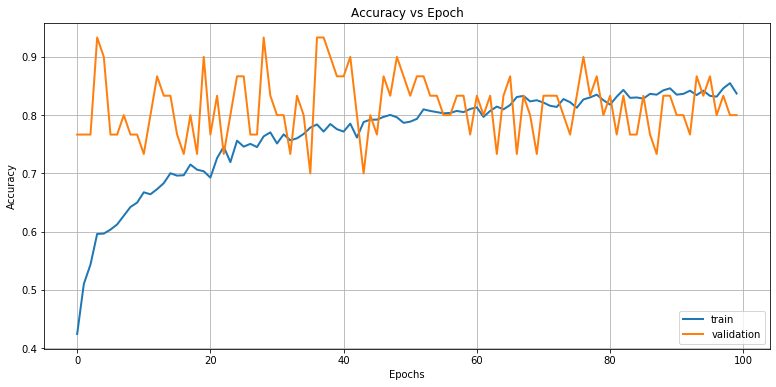

In [86]:
plt.figure(figsize=(13,6))
plt.plot(history.history['acc'], linewidth=2)
plt.plot(history.history['val_acc'], linewidth=2)
plt.title('Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend(['train', 'validation'], loc='lower right')
plt.show()


In [96]:
predict = model.predict(test_X)

In [99]:
header = list(y.columns)

In [100]:
df_predict = pd.DataFrame(predict, columns = header)

In [101]:
for i in range(IdLookupTable.shape[0]):
    IdLookupTable.Location[i] = df_predict.loc[IdLookupTable.ImageId[i]-1][IdLookupTable.FeatureName[i]]

c:\users\alexandre\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [102]:
SampleSubmission.Location = IdLookupTable.Location

In [103]:
SampleSubmission.to_csv('submission_100_epochs_kernel3x3.csv', index=False)